# 📄 Final Report: Employee Performance Analysis

## 🧩 1. Context and Business Problem

Human resource management relies heavily on employee performance analysis. To ensure optimal resource allocation, it is essential to identify:

- High-performing employees  
- Those in need of support  
- Special cases such as excessive absenteeism or persistent dissatisfaction  

**Key Question:**  
How can the company better understand the distribution of employee performance to implement targeted improvement strategies?

## 🎯 2. Project Objectives

This project aims to:

- Analyze the statistical distributions of performance scores, salaries, absences, and HR indicators (satisfaction, engagement)  
- Identify outliers that may reveal abnormal HR situations or require special attention  
- Highlight factors associated with low or high performance to guide HR strategies  
- Prepare an interactive visualization dashboard (Power BI) for monitoring HR indicators  

## 🛠️ 3. Methodology

### a. Data Loading and Cleaning

- **Source**: `HRDataset_v14.csv.xls`, converted to CSV for processing in Python  
- Handle or remove missing values as needed  
- Select relevant quantitative variables:  
  - `PerfScoreID`: Performance index (1 to 5)  
  - `Salary`: Annual salary  
  - `EmpSatisfaction`: Satisfaction score (1 to 5)  
  - `EngagementSurvey`: Engagement survey result (1 to 5)  
  - `Absences`: Number of absences in the year  

### b. Descriptive Statistics

For each variable, compute:

- Mean, Median, Mode  
- Standard Deviation (measure of spread)  
- Quartiles: Q1 (25%), Q3 (75%)  
- Extreme values: Minimum, Maximum  

➡️ These statistics quickly highlight general trends, biases, or anomalies in the data.

### c. Data Visualization

Use the following visual tools:

- **Histograms + KDE (Kernel Density Estimation)**: to observe the distribution shape (e.g., normal, skewed)  
- **Box Plots**: to detect extreme values and spread  
- **Correlation Heatmap**: to uncover linear relationships between variables  
- **Scatter Plots**: to study associations between two variables (e.g., engagement vs. performance)  

### d. Outlier Detection

**Statistical Method:**

- Calculate the **Interquartile Range (IQR)**: `IQR = Q3 - Q1`  
- Define outliers as values:  
  - `< Q1 - 1.5 × IQR` or  
  - `> Q3 + 1.5 × IQR`  

This method is robust for detecting anomalies, even with non-normal distributions.


# Business Problem

Analyze performance gaps and identify outliers to better understand the underlying contributing factors.

# Objective

Study the distributions of performance scores and hours worked using statistical and visual tools.

# Skills to Acquire

1. **Descriptive Statistics**  
   Learn to compute and interpret:  
   - Mean  
   - Median  
   - Mode  
   - Quartiles  
   - Variance  
   - Standard deviation  

2. **Data Visualization**  
   Gain proficiency in creating and interpreting:  
   - Histograms  
   - Box plots  
   - Bar charts  
   - Pie charts  

3. **Outlier Detection**  
   Apply the **Interquartile Range (IQR) method**:  
   - Outlier = value < Q1 - 1.5×IQR or value > Q3 + 1.5×IQR  

4. **Data Manipulation**  
   Use the **Pandas** library for efficient data handling and preprocessing.


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [17]:

# import data

df = pd.read_csv('HRDataset_v14.csv.xls')

#data cleaning and selection features
#print(df.isnull().sum())

data = df[['PerfScoreID', 'Salary', 'EmpSatisfaction', 'EngagementSurvey', 'Absences']].copy()

# Stats descriptives

In [18]:
#descriptive statistics
desc_stats = data.describe().T

#add mode 
desc_stats['mode'] = data.mode().iloc[0]
print(desc_stats[['mean', '50%', 'mode', '25%', '75%', 'std', 'min', 'max']])

                          mean       50%     mode       25%      75%  \
PerfScoreID           2.977492      3.00      3.0      3.00      3.0   
Salary            69020.684887  62810.00  57815.0  55501.50  72036.0   
EmpSatisfaction       3.890675      4.00      3.0      3.00      5.0   
EngagementSurvey      4.110000      4.28      5.0      3.69      4.7   
Absences             10.237942     10.00      4.0      5.00     15.0   

                           std       min       max  
PerfScoreID           0.587072      1.00       4.0  
Salary            25156.636930  45046.00  250000.0  
EmpSatisfaction       0.909241      1.00       5.0  
EngagementSurvey      0.789938      1.12       5.0  
Absences              5.852596      1.00      20.0  


A  **histogram** is a bar plot that divides continuous data into intervals (called 'bins') and counts how many data points fall into each bin. It gives a visual representation of the shape of the data distribution-whether it's symmetric, skewed, flat, concentrated,  etc 

**Histograms + KDE (Kernel Density Estimation)**: To visualize the shape of the distribution (normal, skewed, etc.).


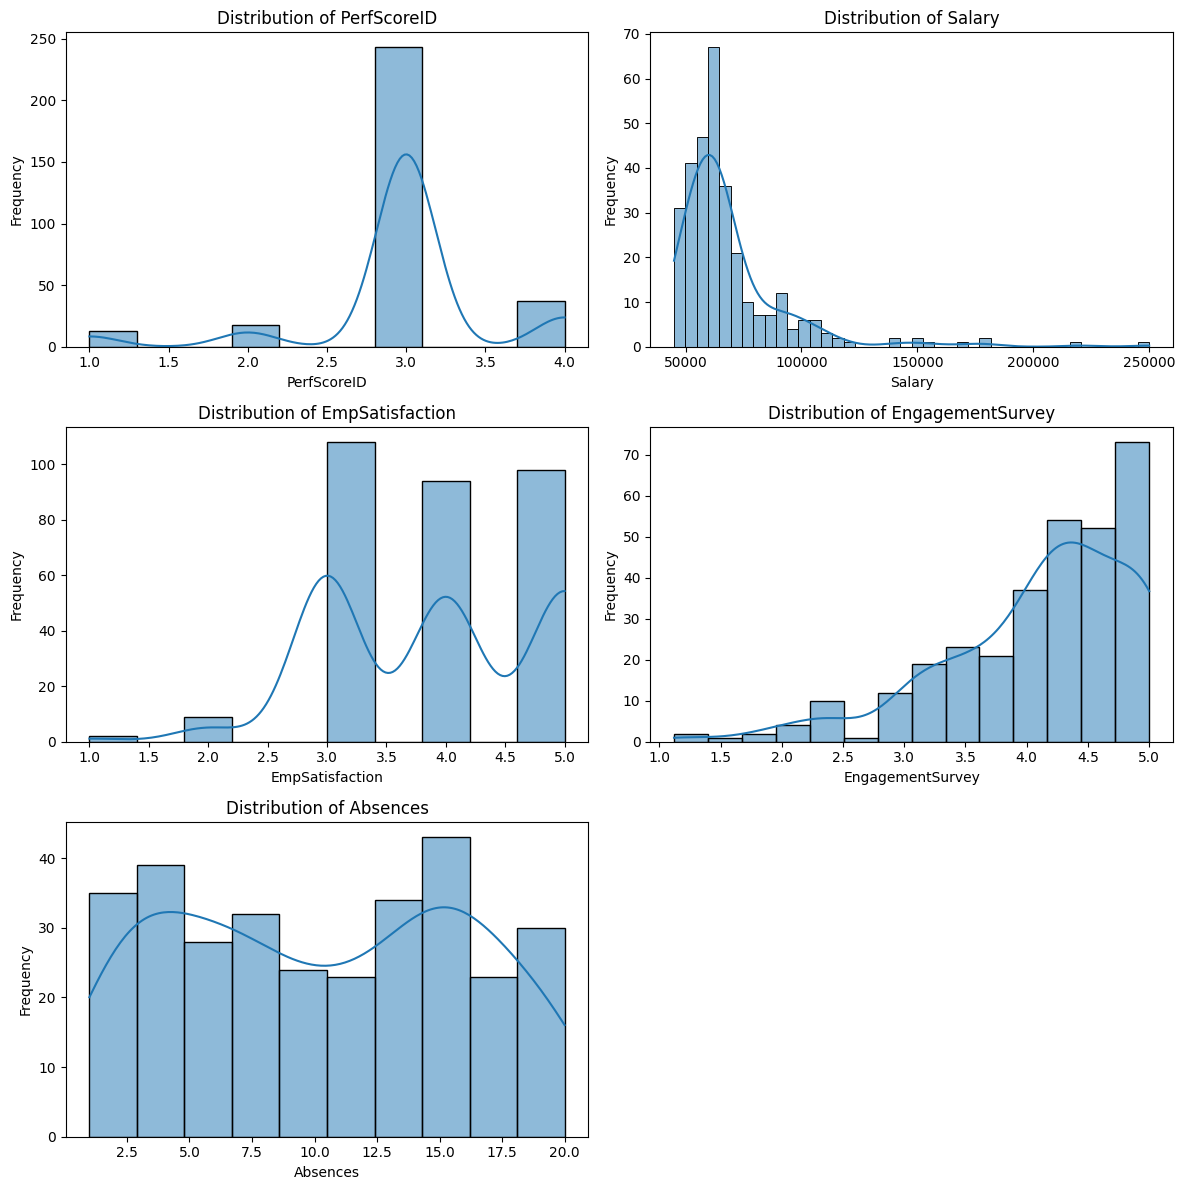

In [19]:
# histograms with KDE 

#Total number of columns
num_cols = len(data.columns)

#Number of plots per row
cols_per_row = 2

#Calculate the number of rows needed
num_rows = math.ceil(num_cols / cols_per_row)

#create the figure and axes
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12,4 * num_rows))
axes = axes.flatten() #flatten to iterate easily

#Plot histograms with KDE for each column
for i, col in enumerate(data.columns): 
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

A **box plot** (also called a **box_and_whisker plot**) is a visual summary of a dataset that shows its central tendency, variabilit, a potential outliers. It's especially unseful for comparing the disctribution of multiple variables or groups 

**Boxplots**: To detect extreme values (outliers).


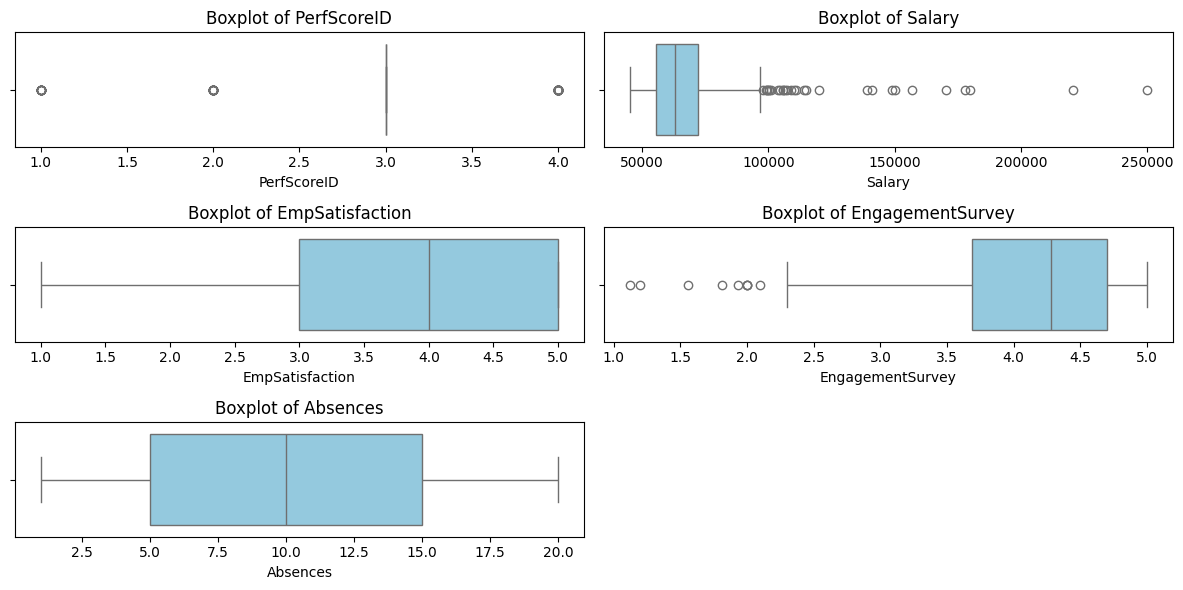

In [20]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include='number').columns
num_cols = len(numeric_cols)
cols_per_row = 2
num_rows = math.ceil(num_cols / cols_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 2 * num_rows))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

# Remove unused axes (optional, for clean layout)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

📊 **Visualization Insights**

1. Performance Scores are highly concentrated around the value of 3, suggesting either a lack of differentiation in evaluations or a low-granularity scoring system.

2. Absences display a wider distribution, with extreme cases reaching up to 20 days.

3. Salaries exhibit a right-skewed distribution, indicating a few exceptionally high earners.


4. High engagement levels (above 4.5) are generally associated with better performance scores.

**outliers detection (method 1.5*IQR)**

In [21]:
def detect_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 - 1.5 *IQR
    outliers = data[(data[column]< lower_bound)| (data[column] > upper_bound)]
    return outliers

#perfomance score of PerfScoreID
outliers_perf = detect_outliers_iqr('PerfScoreID')
print('Outliers PerfScoreID : ')
print(outliers_perf)

Outliers PerfScoreID : 
     PerfScoreID  Salary  EmpSatisfaction  EngagementSurvey  Absences
0              4   62506                5              4.60         1
5              4   57568                5              5.00        15
12             4   92328                4              4.28         9
16             4   70131                3              4.40        16
22             4   62910                3              5.00        19
..           ...     ...              ...               ...       ...
293            4   49773                5              4.30        18
297            2   50274                3              2.50        13
304            4   70507                3              5.00         7
307            1   48513                2              3.20         4
308            4  220450                5              4.60        16

[68 rows x 5 columns]


**Correlation Heatmap**: To identify linear relationships between variables.

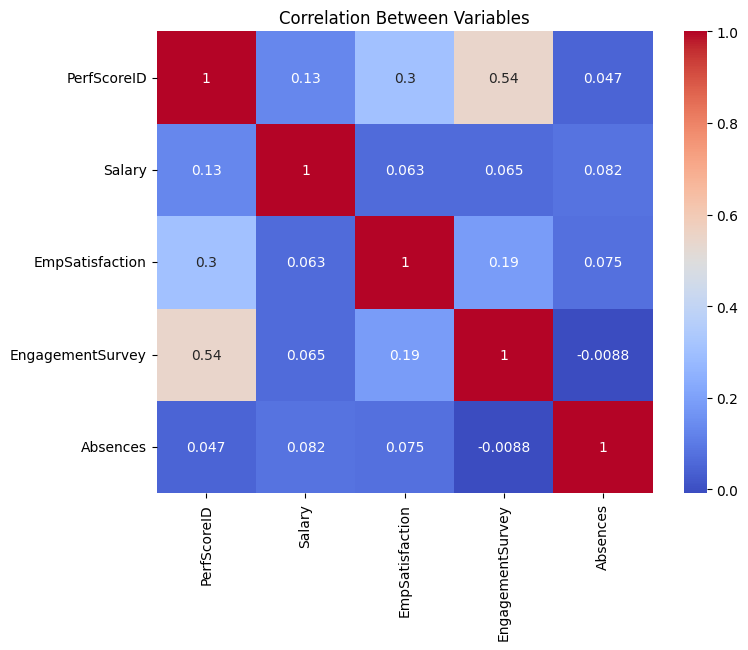

In [25]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


**Correlation Insights**

- There is a moderate positive correlation between EngagementSurvey and PerfScoreID, suggesting that more engaged employees tend to perform better.

- A slight negative correlation is observed between Absences and PerfScoreID, meaning more absences are associated with lower performance.


- No direct correlation was found between Salary and PerfScoreID, which may indicate a mismatch between compensation and performance.

**Scatterplots**: To explore associations between two variables (e.g., engagement vs. performance).

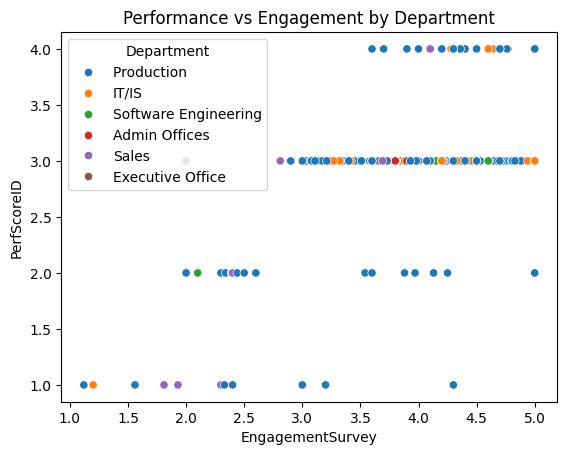

In [26]:
# Example: Scatter plot between Engagement and Performance
sns.scatterplot(data=data, x='EngagementSurvey', y='PerfScoreID', hue=df['Department'])
plt.title('Performance vs Engagement by Department')
plt.show()

## 🚨 Detected Outliers

- **High Salaries** (> $150,000) with **No Exceptional Performance**  
  - Employees with exceptionally high salaries but without corresponding outstanding performance.  
- **Abnormal Absences** (20 days)  
  - Absenteeism reaching 20 days, potentially indicating cases that need further attention or monitoring.  
- **Low Satisfaction** (< 2) among **High Performers**  
  - Some highly performing employees have low satisfaction scores, which could signal a **risk of turnover** if no action is taken.

## 🧠 5. HR Interpretations and Recommendations

- A **performance score** too concentrated around 3 may indicate **uniform evaluations** that lack precision and differentiation.  
- **Dissatisfied but high-performing employees** may leave the company if no intervention is made.  
- **Salaries disconnected from performance** could lead to **internal tensions** or a **decline in motivation**.  
- **High absenteeism** should be analyzed more deeply: Is it due to **medical reasons**, **lack of engagement**, or **work overload**?


## 🔄 Proposed Actions:

- **Review the performance evaluation grid** to introduce more granularity.  
- **Conduct satisfaction interviews** for at-risk profiles.  
- **Audit salary practices** to ensure alignment between performance and compensation.  
- **Implement a dynamic dashboard** for continuous tracking.

## 📦 6. Study Limitations

- **Undated data:** No temporal dynamics (e.g., performance evolution over time).  
- **Subjectivity in performance scores (PerfScoreID):** Remains subjective unless defined by clear, objective criteria.  
- **Exclusion of qualitative variables:** The project currently doesn't take into account qualitative factors (e.g., department, gender) in the analysis.
"""

In [14]:
colonnes_utiles = [
    'Employee_Name', 'Position', 'Department', 'PerfScoreID', 'Salary', 
    'EmpSatisfaction', 'EngagementSurvey', 'Absences', 'MaritalDesc', 'RecruitmentSource'
]
df1 = df[colonnes_utiles]


In [15]:
df1 = df1.rename(columns={
    'Employee_Name': 'Nom',
    'Position': 'Poste',
    'Department': 'Département',
    'PerfScoreID': 'Performance',
    'EmpSatisfaction': 'Satisfaction',
    'EngagementSurvey': 'Engagement',
    'MaritalDesc': 'Statut_Marital',
    'RecruitmentSource': 'Source_Recrutement'
})


In [16]:
df.to_csv("Donnees_Preparees_Pour_PowerBI.csv", index=False)
